In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pretty_midi
import numpy as np
import librosa
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

%matplotlib inline

In [36]:
midi_path = "Pop_Music_Midi/All The Small Things - Chorus.midi"
midi_data = pretty_midi.PrettyMIDI(midi_path)
piece = midi_path.split('/')[-1][:-4]
fs = midi_data.resolution

All The Small Things - Chorus.


In [55]:
piano_matrix = midi_data.get_piano_roll(fs=fs)
midi_chroma = midi_data.get_chroma(fs=fs)


(128, 4095)


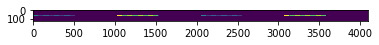

In [57]:
plt.imshow(piano_matrix)
print(np.shape(piano_matrix))

(12, 4095)


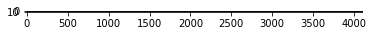

In [59]:
plt.imshow(midi_chroma)
print(np.shape(midi_chroma))

In [60]:
import midi_manipulation

f = midi_path
song = np.array(midi_manipulation.midiToNoteStateMatrix(f))

(257, 156)
<class 'numpy.ndarray'>


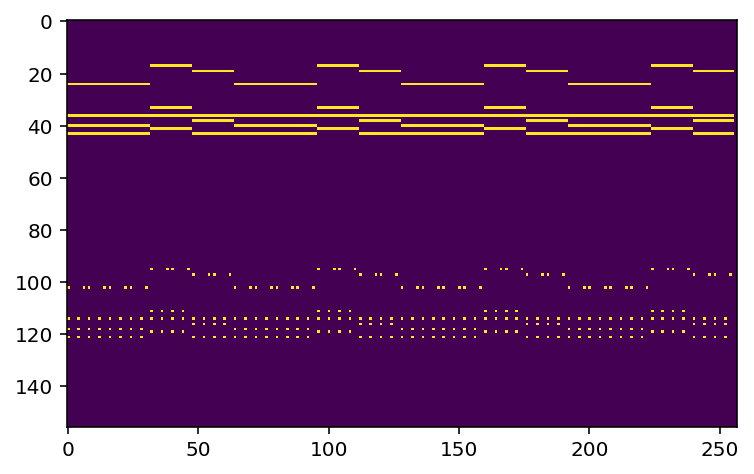

In [81]:
plt.imshow(song.T)
print(np.shape(song))
print(type(song))

In [127]:
chroma = np.zeros(shape=(np.shape(song)[0], 12))
for i in range(np.shape(song)[0]):
    for j in range(78):
        if song[i][j] == 1:
            chroma[i][np.mod(j,12)] += 1
print(chroma[1])

[2. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]


In [108]:
print(np.mod(song[23],12))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [82]:
beat_num = 4
beats_time = midi_data.get_beats()
bar_time = [beats_time[i] for i in range(0,len(beats_time),beat_num)]
bar_time = np.append(bar_time, midi_data.get_end_time())
beats = np.floor(beats_time*fs).astype(int)
bars = [beats[i] for i in range(0,len(beats),beat_num)]

In [83]:
bar_chroma = librosa.util.sync(midi_chroma, bars, aggregate=np.max)+np.finfo(float).eps

In [109]:
bar_chroma = bar_chroma.T[2:,:].T

[[162. 118.  81.  81. 264. 220. 183.  81. 162. 118. 183.  81.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 183.   0.   0.   0. 183.   0.   0.   0. 183.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [183. 161.   0.   0.  81.  59.   0.   0. 183. 161.   0.   0.]
 [  0.   0. 264.   0.   0.   0. 162.   0.   0.   0. 162.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 81.  59.   0. 162.  81.  59.   0. 162.  81.  59.   0. 162.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  81.   0.   0.   0.  81.   0.   0.   0.  81.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


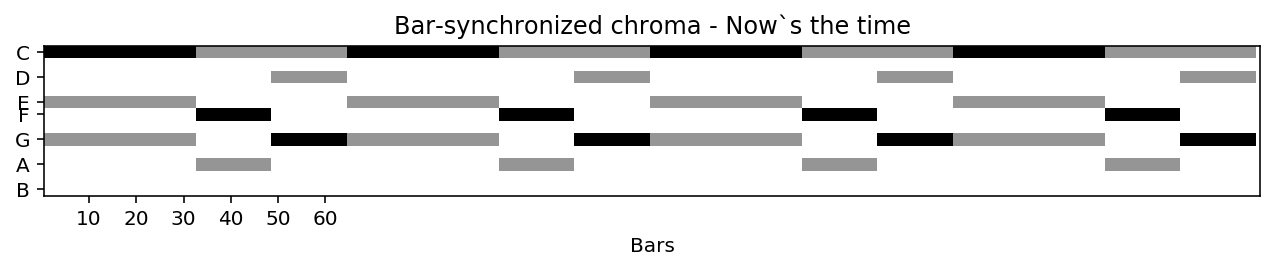

In [129]:
plt.figure(figsize=(9, 2))
# plt.imshow(bar_chroma, aspect='auto', interpolation='nearest', cmap='Greys')
plt.imshow(chroma.T, aspect='auto', interpolation='nearest', cmap='Greys')
plt.title('Bar-synchronized chroma - Now`s the time')
plt.yticks([0,2,4,5,7,9,11], ['C','D','E','F','G','A','B'])
plt.xticks(range(9,60,10),range(10,70,10))
plt.xlabel('Bars')
plt.tight_layout()
plt.savefig('midi_chroma.pdf')